# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading data

In [2]:
# Project path
path = r'/Users/davidgriesel/Documents/0 - CareerFoundry/04 - Data Analytics Immersion/06 - Advanced Analytics & Dashboard Design'

In [3]:
# Dataset
df_quality = pd.read_pickle(os.path.join(path, 'Coffee Quality - CQ 202411', '02 - Data', 'Prepared Data','coffee_quality_cleaned.pkl'))

In [4]:
# Configuration
%matplotlib inline 

# Checking data

In [5]:
# Dimensions
df_quality.shape

(945, 21)

In [6]:
# Preview
df_quality.head()

,Species,Continent_of_Origin,Country_of_Origin,Harvest_Year,Expiration,Variety,Color,Processing_Method,Aroma,Flavor,...,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Moisture,Quakers,Category_One_Defects,Category_Two_Defects
1,Arabica,Africa,Ethiopia,2014-01-01,2016-04-03,Other,Green,Washed / Wet,8.75,8.67,...,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1
4,Arabica,Africa,Ethiopia,2014-01-01,2016-04-03,Other,Green,Washed / Wet,8.25,8.50,...,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2
6,Arabica,South America,Peru,2012-01-01,2013-09-17,Other,Bluish-Green,Washed / Wet,8.42,8.50,...,8.50,8.25,8.25,10.0,10.0,10.0,0.11,0,0,0
9,Arabica,Africa,Ethiopia,2014-01-01,2016-03-29,Other,Green,Natural / Dry,8.08,8.58,...,8.50,7.67,8.42,10.0,10.0,10.0,0.10,0,0,4
18,Arabica,Asia,China,2015-01-01,2017-04-07,Catimor,Green,Washed / Wet,8.42,8.25,...,8.17,7.92,8.00,10.0,10.0,10.0,0.10,0,0,0


# Cleaning data

## Extreme value checks - Aroma

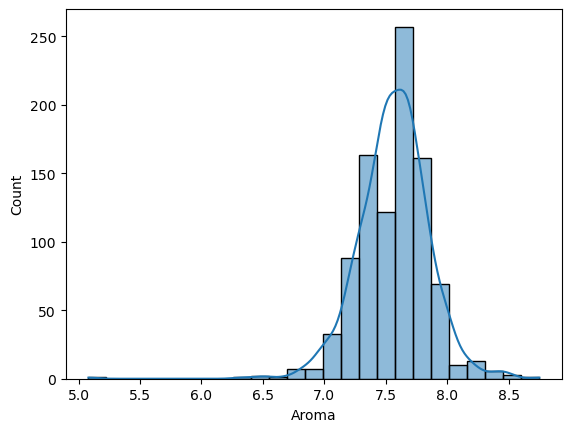

In [7]:
# Histogram - Aroma
sns.histplot(df_quality['Aroma'], bins = 25, kde = True)
plt.show()

In [8]:
# Basic statistics - Aroma

In [9]:
df_quality['Aroma'].min()

5.08

In [10]:
df_quality['Aroma'].max()

8.75

In [11]:
df_quality['Aroma'].median()

7.58

In [12]:
df_quality['Aroma'].mean()

7.564984126984127

##### Mean and median are close suggesting only a slight skew.

## Extreme value checks - Flavor

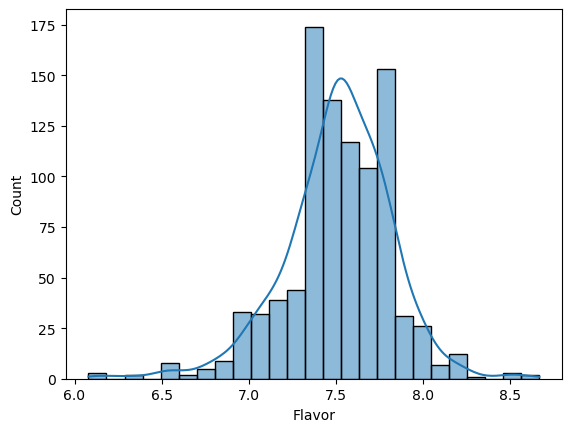

In [13]:
# Histogram - Flavor
sns.histplot(df_quality['Flavor'], bins = 25, kde = True)
plt.show()

In [14]:
# Basic statistics - Flavor

In [15]:
df_quality['Flavor'].min()

6.08

In [16]:
df_quality['Flavor'].max()

8.67

In [17]:
df_quality['Flavor'].mean()

7.513735449735449

In [18]:
df_quality['Flavor'].median()

7.5

##### Mean and median are close suggesting only a slight skew.

## Extreme value checks - Aftertaste

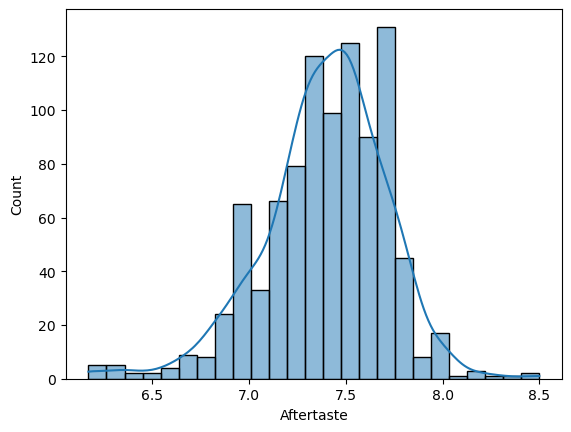

In [19]:
# Histogram - Aftertaste
sns.histplot(df_quality['Aftertaste'], bins = 25, kde = True)
plt.show()

In [20]:
# Basic statistics - Aftertaste

In [21]:
df_quality['Aftertaste'].min()

6.17

In [22]:
df_quality['Aftertaste'].max()

8.5

In [23]:
df_quality['Aftertaste'].mean()

7.392814814814815

In [24]:
df_quality['Aftertaste'].median()

7.42

##### Mean and median are close suggesting only a slight skew.

## Extreme value checks - Acidity

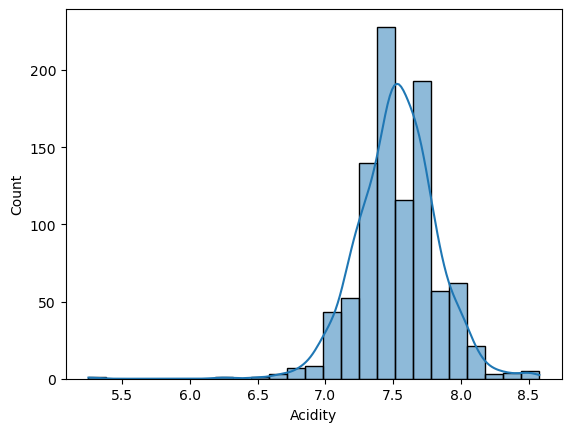

In [25]:
# Histogram - Acidity
sns.histplot(df_quality['Acidity'], bins = 25, kde = True)
plt.show()

In [26]:
# Basic statistics - Acidity

In [27]:
df_quality['Acidity'].min()

5.25

In [28]:
df_quality['Acidity'].max()

8.58

In [29]:
df_quality['Acidity'].mean()

7.53058201058201

In [30]:
df_quality['Acidity'].median()

7.5

##### Mean and median are close suggesting only a slight skew.

## Extreme value checks - Body

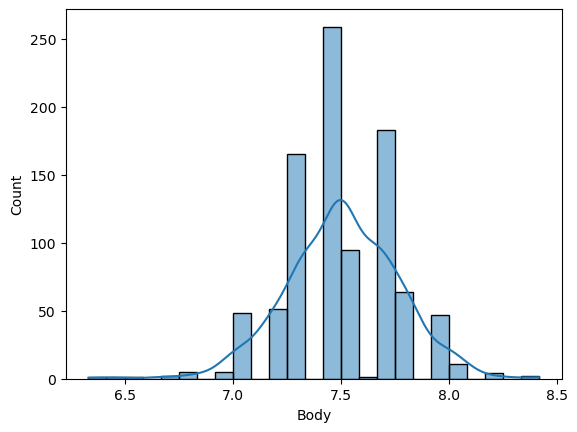

In [31]:
# Histogram - Body
sns.histplot(df_quality['Body'], bins = 25, kde = True)
plt.show()

In [32]:
# Basic statistics - Body

In [33]:
df_quality['Body'].min()

6.33

In [34]:
df_quality['Body'].max()

8.42

In [35]:
df_quality['Body'].mean()

7.5082962962962965

In [36]:
df_quality['Body'].median()

7.5

##### Mean and median are close suggesting only a slight skew.

## Extreme value checks - Balance

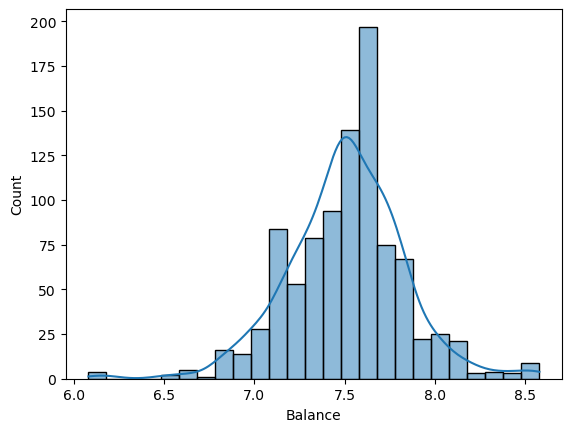

In [37]:
# Histogram - Balance
sns.histplot(df_quality['Balance'], bins = 25, kde = True)
plt.show()

In [38]:
# Basic statistics - Balance

In [39]:
df_quality['Balance'].min()

6.08

In [40]:
df_quality['Balance'].max()

8.58

In [41]:
df_quality['Balance'].mean()

7.509460317460318

In [42]:
df_quality['Balance'].median()

7.5

##### Mean and median are close suggesting only a slight skew.

# Visual exploration

##### Variables with strongest correlation from Exercise 3.2:
- Aftertaste vs Flavor
- Aftertaste vs Balance
- Flavor vs Acidity
- Flavor vs Balance
- Flavor vs Aroma
- Balance vs Body<br><br>

## Aftertaste vs Flavor

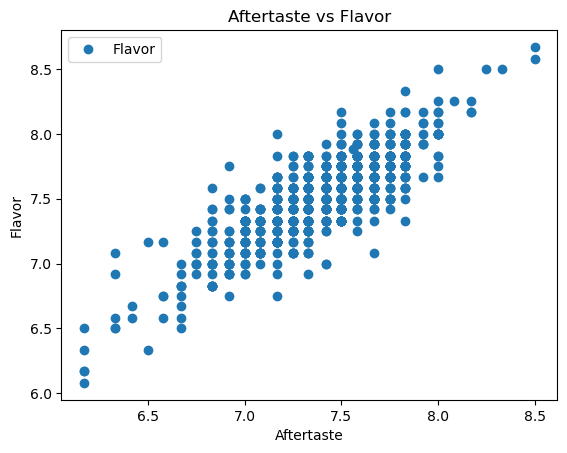

In [43]:
# Scatterplot
df_quality.plot(x = 'Aftertaste', y = 'Flavor',style = 'o')
plt.title('Aftertaste vs Flavor')  
plt.xlabel('Aftertaste')  
plt.ylabel('Flavor')  
plt.show()

## Aftertaste vs Balance

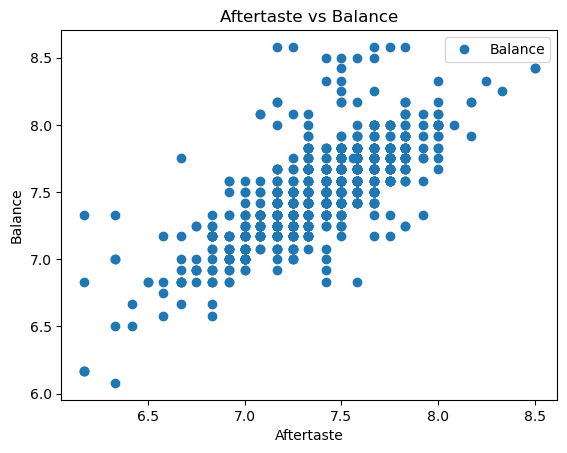

In [44]:
# Scatterplot
df_quality.plot(x = 'Aftertaste', y = 'Balance',style = 'o')
plt.title('Aftertaste vs Balance')  
plt.xlabel('Aftertaste')  
plt.ylabel('Balance')  
plt.show()

## Flavor vs Acidity

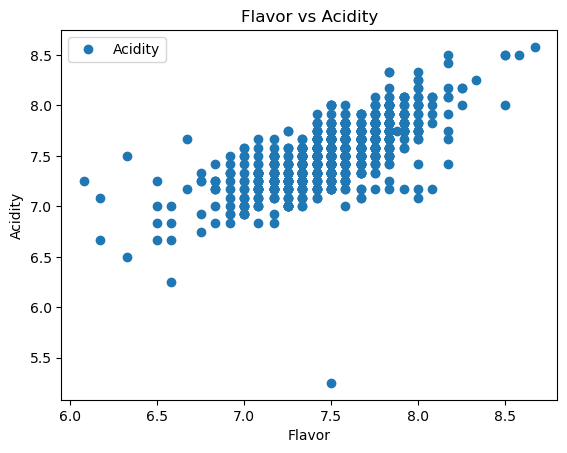

In [45]:
# Scatterplot
df_quality.plot(x = 'Flavor', y = 'Acidity',style = 'o')
plt.title('Flavor vs Acidity')  
plt.xlabel('Flavor')  
plt.ylabel('Acidity')  
plt.show()

## Flavor vs Balance

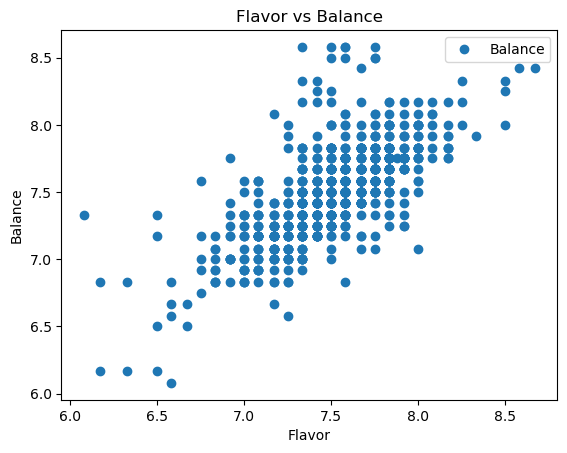

In [46]:
# Scatterplot
df_quality.plot(x = 'Flavor', y = 'Balance',style = 'o')
plt.title('Flavor vs Balance')  
plt.xlabel('Flavor')  
plt.ylabel('Balance')  
plt.show()

## Flavor vs Aroma

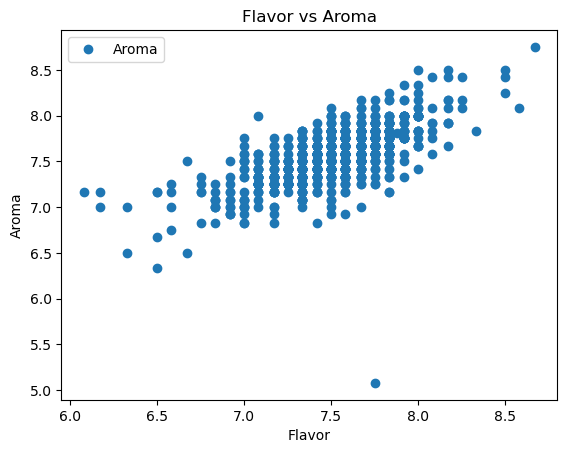

In [47]:
# Scatterplot
df_quality.plot(x = 'Flavor', y = 'Aroma',style = 'o')
plt.title('Flavor vs Aroma')  
plt.xlabel('Flavor')  
plt.ylabel('Aroma')  
plt.show()

## Balance vs Body

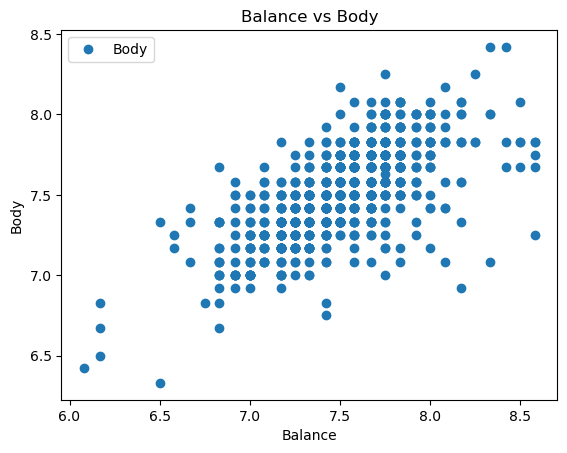

In [48]:
# Scatterplot
df_quality.plot(x = 'Balance', y = 'Body',style = 'o')
plt.title('Balance vs Body')  
plt.xlabel('Balance')  
plt.ylabel('Body')  
plt.show()

# Hypotheses

##### The following variables appear most frequently among those with the strongest correlations:
- Aftertaste
- Flavor
- Balance<br><br>

##### Hypothesis #1
- The higher the score for Aftertaste, the higher the score for Flavor would be.<br><br>

##### Hypothesis #2
- The higher the score for Aftertaste, the higher the score for Balance would be.<br><br>

## Hypothesis #1

### Reshape variables

In [49]:
# Reshape variables
X1 = df_quality['Aftertaste'].values.reshape(-1,1)
y1 = df_quality['Flavor'].values.reshape(-1,1)

### Split data

In [50]:
# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

### Linear regression

In [51]:
# Create regression object
regression_1 = LinearRegression()

In [52]:
# Fit the regression object onto the training set
regression_1.fit(X1_train, y1_train)

LinearRegression()

In [53]:
# Predict the values of y1 using X1
y1_predicted = regression_1.predict(X1_test)

### Regression plot

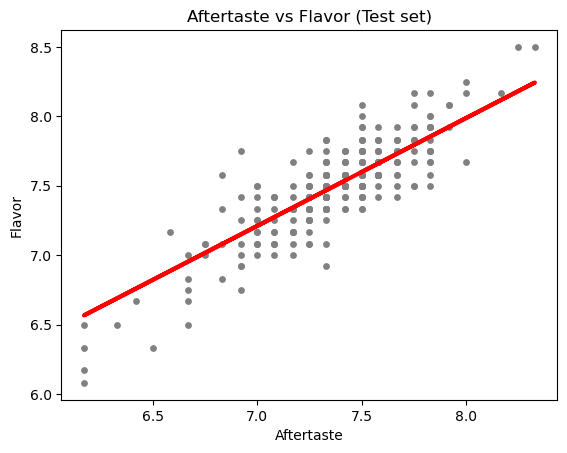

In [54]:
# Plot the modelled regression - test set
plot_test_1 = plt
plot_test_1.scatter(X1_test, y1_test, color = 'gray', s = 15)
plot_test_1.plot(X1_test, y1_predicted, color = 'red', linewidth = 3)
plot_test_1.title('Aftertaste vs Flavor (Test set)')
plot_test_1.xlabel('Aftertaste')
plot_test_1.ylabel('Flavor')
plot_test_1.show()

##### Comments
- The data points appear to be evenly distributed around the regression line.

### Model performance statistics (Test set)

In [55]:
# Create objects that contain the model summary statistics
rmse_1 = mean_squared_error(y1_test, y1_predicted) 
r2_1 = r2_score(y1_test, y1_predicted) 

In [56]:
# Print the model summary statistics
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[0.77654044]]
Mean squared error:  0.031563293173207344
R2 score:  0.7305230539312092


### Actual vs predicted y-values

In [57]:
# Create a dataframe comparing the actual and predicted values of y1
data_1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data_1.head(30)

,Actual,Predicted
0,7.50,7.536944
1,7.33,7.342809
2,7.33,7.467055
3,8.17,7.793202
4,7.58,7.404932
5,7.67,7.661190
6,7.33,7.404932
7,7.17,7.210797
8,7.08,7.148674
9,7.42,7.599067


##### Comments
- The predicted y-values are fairly close to the actual y-values with some over, and some under. 

### Model performance statistics (Training set)

In [58]:
# Predict
y1_predicted_train = regression_1.predict(X1_train)

In [59]:
rmse_1 = mean_squared_error(y1_train, y1_predicted_train)
r2_1 = r2_score(y1_train, y1_predicted_train)

In [60]:
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[0.77654044]]
Mean squared error:  0.029287772376638082
R2 score:  0.6660234980676127


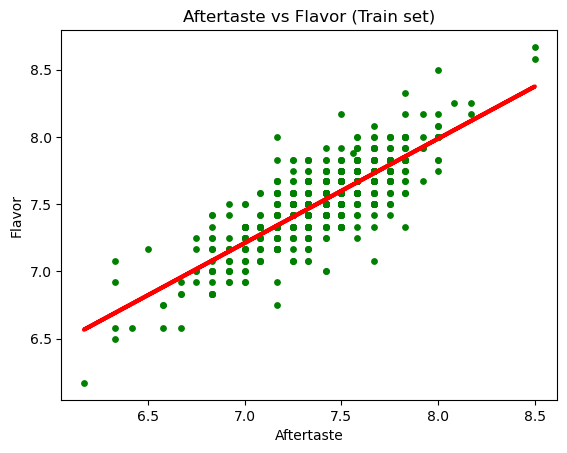

In [61]:
# Visualizing the training set results
plot_test_1 = plt
plot_test_1.scatter(X1_train, y1_train, color='green', s = 15)
plot_test_1.plot(X1_train, y1_predicted_train, color='red', linewidth =3)
plot_test_1.title('Aftertaste vs Flavor (Train set)')
plot_test_1.xlabel('Aftertaste')
plot_test_1.ylabel('Flavor')
plot_test_1.show()

### Performance
- The MSE is low, indicating predictions are close to actual values.
- The R2 score indicates that 73.1% of the variance in Flavor is explained by Aftertaste.
- Overall, the model explains a significant portion of the variance and makes predictions with relatively small errors.
- The values between the test and training sets are also closely aligned, which suggests that the model performs consistently.

## Hypothesis #2

### Reshape variables

In [62]:
# Reshape variables
X2 = df_quality['Aftertaste'].values.reshape(-1,1)
y2 = df_quality['Flavor'].values.reshape(-1,1)

### Split data

In [63]:
# Split data into 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

### Linear regression

In [64]:
# Create regression object
regression_2 = LinearRegression()

In [65]:
# Fit the regression object onto the training set.
regression_2.fit(X2_train, y2_train)

LinearRegression()

In [66]:
# Predict the values of y using X2
y2_predicted = regression_2.predict(X2_test)

### Regression plot

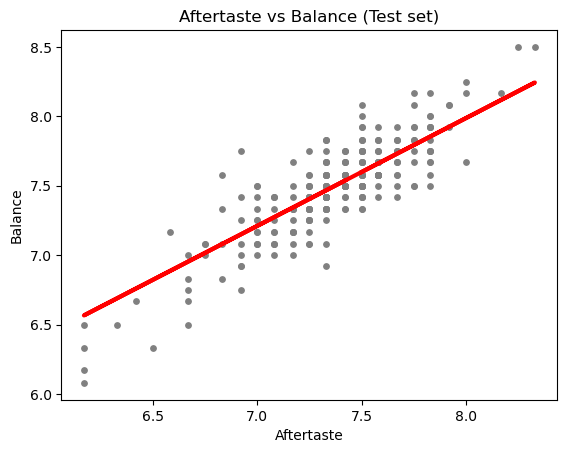

In [67]:
# Plot the modelled regression - test set
plot_test_2 = plt
plot_test_2.scatter(X2_test, y2_test, color = 'gray', s = 15)
plot_test_2.plot(X2_test, y2_predicted, color = 'red', linewidth = 3)
plot_test_2.title('Aftertaste vs Balance (Test set)')
plot_test_2.xlabel('Aftertaste')
plot_test_2.ylabel('Balance')
plot_test_2.show()

##### Comments
- The data points appear to be evenly distributed around the regression line.

### Model performance statistics (Test set)

In [68]:
# Create objects that contain the model summary statistics
rmse_2 = mean_squared_error(y2_test, y2_predicted) 
r2_2 = r2_score(y2_test, y2_predicted) 

In [69]:
# Print the model summary statistics
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.77654044]]
Mean squared error:  0.031563293173207344
R2 score:  0.7305230539312092


### Actual vs predicted y-values

In [70]:
# Create a dataframe comparing the actual and predicted values of y2
data_2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data_2.head(30)

,Actual,Predicted
0,7.50,7.536944
1,7.33,7.342809
2,7.33,7.467055
3,8.17,7.793202
4,7.58,7.404932
5,7.67,7.661190
6,7.33,7.404932
7,7.17,7.210797
8,7.08,7.148674
9,7.42,7.599067


##### Comments
- The predicted y-values are fairly close to the actual y-values with some over, and some under. 

### Model performance statistics (Training set)

In [71]:
# Predict
y2_predicted_train = regression_2.predict(X2_train)

In [72]:
rmse_2 = mean_squared_error(y2_train, y2_predicted_train)
r2_2 = r2_score(y2_train, y2_predicted_train)

In [73]:
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.77654044]]
Mean squared error:  0.029287772376638082
R2 score:  0.6660234980676127


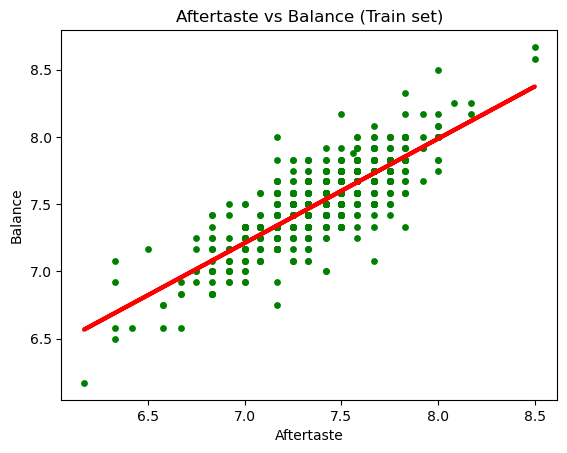

In [74]:
# Visualizing the training set results
plot_test_2 = plt
plot_test_2.scatter(X2_train, y2_train, color='green', s = 15)
plot_test_2.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test_2.title('Aftertaste vs Balance (Train set)')
plot_test_2.xlabel('Aftertaste')
plot_test_2.ylabel('Balance')
plot_test_2.show()

### Performance
- The MSE is low, indicating predictions are close to actual values.
- The R2 score indicates that 73.05% of the variance in Balance is explained by Aftertaste.
- Overall, the model explains a significant portion of the variance and makes predictions with relatively small errors.
- The values between the test and training sets are also closely aligned, which suggests that the model performs consistently.

# Tasks

## Install the scikit-learn library.

##### Library installed<br><br>

## Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

##### Refer 1: Importing libraries<br><br>

## Clean your data so that it’s ready for analysis.

##### Refer 4: Cleaning data<br><br>

## Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

##### Refer 5 Visual exploration<br><br>

## State your hypothesis in a markdown cell within your Jupyter notebook.

##### Refer 6: Hypotheses<br><br>

## Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

##### Refer 6.1.1: Reshape variables (Hypothesis #1)
##### Refer 6.2.1: Reshape variables (Hypothesis #2)<br><br>

## Split the data into two sets: a training set and a test set.

##### Refer 6.1.2: Split data (Hypothesis #1)
##### Refer 6.2.2: Split data (Hypothesis #2)<br><br>

## Run a linear regression on the data.
- First, fit the model you created to the training set.
- Then, create a prediction for y on the test set.

##### Refer 6.1.3: Linear regression (Hypothesis #1)
##### Refer 6.2.3: Linear regression (Hypothesis #2)<br><br>

## Create a plot that shows the regression line on the test set.

##### Refer 6.1.4: Regression plot (Hypothesis #1)
##### Refer 6.2.4: Regression plot (Hypothesis #2)<br><br>

## Write your own interpretation of how well the line appears to fit the data in a markdown cell.

##### Refer 6.1.4: Regression plot - Markdown (Hypothesis #1)
##### Refer 6.2.4: Regression plot - Markdown (Hypothesis #2)<br><br>

## Check the model performance statistics—MSE and R2 score.

##### Refer 6.1.5: Model performance statistics (Test set) (Hypothesis #1)
##### Refer 6.1.7: Model performance statistics (Training set) (Hypothesis #1)<br><br>
##### Refer 6.2.5: Model performance statistics (Test set) (Hypothesis #2)
##### Refer 6.2.7: Model performance statistics (Training set) (Hypothesis #2)<br><br>

## Compare the predicted y values with the actual y values in a dataframe.

##### Refer 6.1.6: Actual vs predicted y-values - Markdown (Hypothesis #1)
##### Refer 6.2.6: Actual vs predicted y-values - Markdown (Hypothesis #2)<br><br>

## Include your thoughts on how well the model performed on the test set in a markdown cell.
- Include any reflections you have on the impact of possible data bias.

##### Refer 6.1.8: Performance (Hypothesis #1)
##### Refer 6.2.8: Performance (Hypothesis #2)<br><br>

## Save your notebook and submit it for your tutor to review.

##### Notebook saved and submitted<br><br>